In [1]:
import os
import re
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skimage.io
import skimage.exposure


In [2]:
debug = True

In [3]:
def normalize(img):
    """
    Function copied from https://github.com/jr0th/segmentation/blob/master/visualization/CellArt.ipynb
    """
    # normalize to [0,1]
    percentile = 99
    high = np.percentile(img, percentile)
    low = np.percentile(img, 100 - percentile)

    img = np.minimum(high, img)
    img = np.maximum(low, img)

    # gives float64, thus cast to 8 bit later
    img = (img - low) / (high - low)

    img = skimage.img_as_ubyte(img)
    return img


def colorize_image(img, col):
    """
    Function copied from https://github.com/jr0th/segmentation/blob/master/visualization/CellArt.ipynb
    """
    # rescale image
    img_float = img.astype(np.float)
    img_float = img_float / 255

    # colorize
    img_col_float = np.reshape(img_float, img_float.shape + (1,)) * col
    img_col_byte = img_col_float.astype(np.uint8)

    return img_col_byte

In [4]:
#load_pattern = f'../NF1_Project_Figure/C6_01_1_Channels/'

# Load in images for Wild Type Schwann Cells (NF1 +/+)

DAPI_path = f'../NF1_Project_Figure/C6_01_1_Channels/C6_01_1_1_DAPI_001.tif'
GFP_path = f'../NF1_Project_Figure/C6_01_1_Channels/C6_01_2_1_GFP_001.tif'
RFP_path = f'../NF1_Project_Figure/C6_01_1_Channels/C6_01_3_1_RFP_001.tif'

ch1 = skimage.io.imread(DAPI_path)
ch2 = skimage.io.imread(GFP_path)
ch3 = skimage.io.imread(RFP_path)



In [5]:
ch1 = normalize(ch1)
ch2 = normalize(ch2)
ch3 = normalize(ch3)

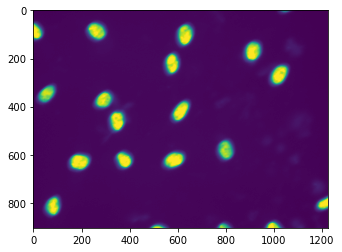

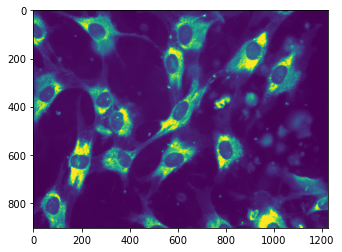

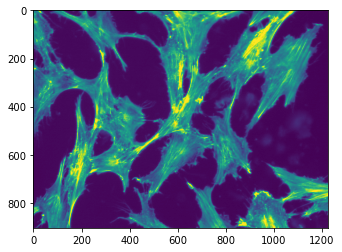

In [6]:
if(debug):
    plt.imshow(ch1)
    plt.show()
    plt.imshow(ch2)
    plt.show()
    plt.imshow(ch3)
    plt.show()

# 1 = DAPI = blue
# 2 = GFP = green
# 3 = RFP = red

col1 = np.array([0, 0, 255], dtype=np.uint8)
col2 = np.array([0, 255, 0], dtype=np.uint8)
col3 = np.array([255, 0, 0], dtype=np.uint8)


In [7]:
# colorize images
ch1_col = colorize_image(ch1, col1)
ch2_col = colorize_image(ch2, col2)
ch3_col = colorize_image(ch3, col3)

/tmp/ipykernel_842268/1474779247.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_float = img.astype(np.float)


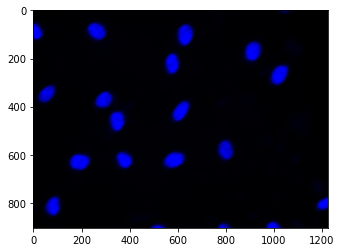

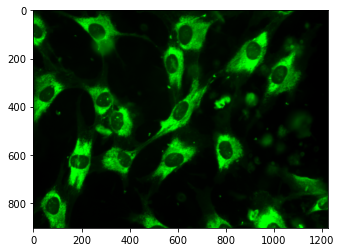

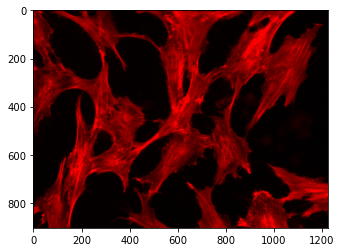

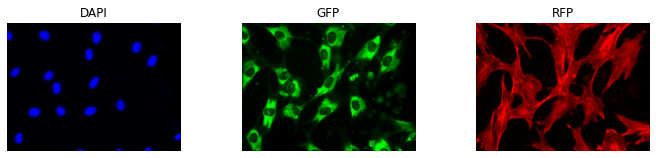

In [8]:
# plot the images
plt.imshow(ch1_col)
plt.show()
plt.imshow(ch2_col)
plt.show()
plt.imshow(ch3_col)

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(10,2))

ax[0].imshow(ch1_col)
ax[1].imshow(ch2_col)
ax[2].imshow(ch3_col)


ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')


ax[0].set_title('DAPI')
ax[1].set_title('GFP')
ax[2].set_title('RFP')

# fig.subplots_adjust(wspace=0)
plt.tight_layout(pad=0)
#plt.savefig('./art_channels_' + plate + '_' + well + '_' + site + '.png')
plt.show()

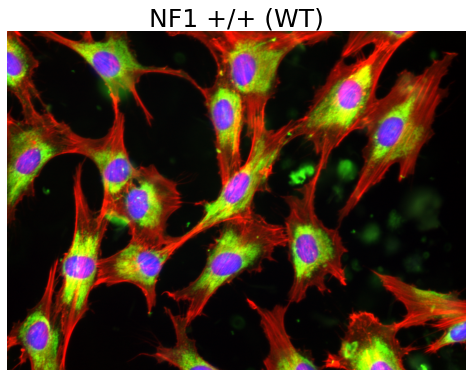

In [9]:
# combine final image

# combination parameters
fac1 = 2
fac2 = 2
fac3 = 2

WT = normalize(
    fac1 * ch1_col.astype(np.uint16) +
    fac2 * ch2_col.astype(np.uint16) + 
    fac3 * ch3_col.astype(np.uint16))

plt.figure(figsize=(7,5))
plt.imshow(WT)
plt.axis('off')
plt.tight_layout()
plt.title('NF1 +/+ (WT)', size = 25)
#plt.savefig('./art_' + plate + '_' + well + '_' + site + '.png')
plt.show()



In [10]:
# Load in Heterozygous Schwann Cell (NF1 +/-)

DAPI_path2 = f'../NF1_Project_Figure/C7_01_2_Channels/C7_01_1_2_DAPI_001.tif'
GFP_path2 = f'../NF1_Project_Figure/C7_01_2_Channels/C7_01_2_2_GFP_001.tif'
RFP_path2 = f'../NF1_Project_Figure/C7_01_2_Channels/C7_01_3_2_RFP_001.tif'

ch1_2 = skimage.io.imread(DAPI_path2)
ch2_2 = skimage.io.imread(GFP_path2)
ch3_2 = skimage.io.imread(RFP_path2)

In [11]:
ch1_2 = normalize(ch1_2)
ch2_2 = normalize(ch2_2)
ch3_2 = normalize(ch3_2)

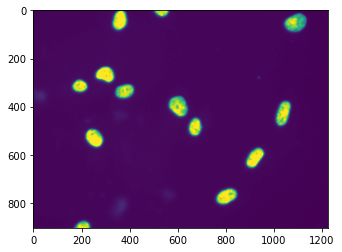

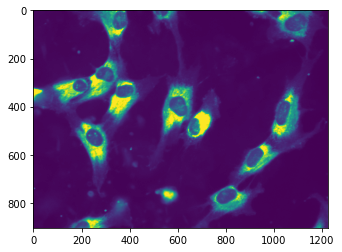

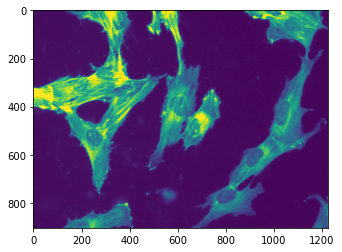

In [12]:
if(debug):
    plt.imshow(ch1_2)
    plt.show()
    plt.imshow(ch2_2)
    plt.show()
    plt.imshow(ch3_2)
    plt.show()

# 1 = DAPI = blue
# 2 = GFP = green
# 3 = RFP = red

col1 = np.array([0, 0, 255], dtype=np.uint8)
col2 = np.array([0, 255, 0], dtype=np.uint8)
col3 = np.array([255, 0, 0], dtype=np.uint8)

In [13]:
# colorize images
ch1_2_col = colorize_image(ch1_2, col1)
ch2_2_col = colorize_image(ch2_2, col2)
ch3_2_col = colorize_image(ch3_2, col3)

/tmp/ipykernel_842268/1474779247.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_float = img.astype(np.float)


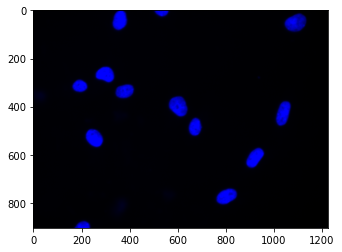

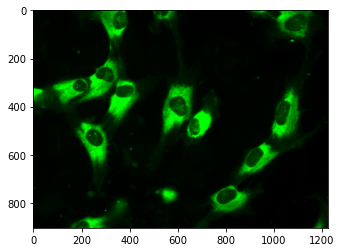

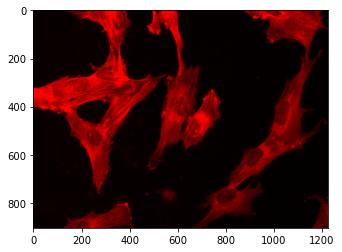

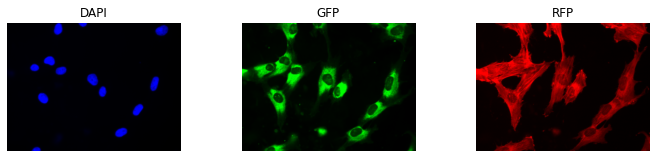

In [14]:
# plot the images
plt.imshow(ch1_2_col)
plt.show()
plt.imshow(ch2_2_col)
plt.show()
plt.imshow(ch3_2_col)

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(10,2))

ax[0].imshow(ch1_2_col)
ax[1].imshow(ch2_2_col)
ax[2].imshow(ch3_2_col)


ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')


ax[0].set_title('DAPI')
ax[1].set_title('GFP')
ax[2].set_title('RFP')

# fig.subplots_adjust(wspace=0)
plt.tight_layout(pad=0)
#plt.savefig('./art_channels_' + plate + '_' + well + '_' + site + '.png')
plt.show()

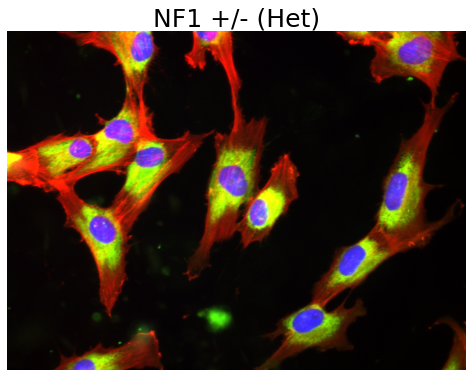

In [15]:
# combine final image

# combination parameters
fac1_2 = 2
fac2_2 = 2
fac3_2 = 2

Het = normalize(
    fac1_2 * ch1_2_col.astype(np.uint16) +
    fac2_2 * ch2_2_col.astype(np.uint16) + 
    fac3_2 * ch3_2_col.astype(np.uint16))

plt.figure(figsize=(7,5))
plt.imshow(Het)
plt.axis('off')
plt.tight_layout()
plt.title('NF1 +/- (Het)', size = 25)
#plt.savefig('./art_' + plate + '_' + well + '_' + site + '.png')
plt.show()

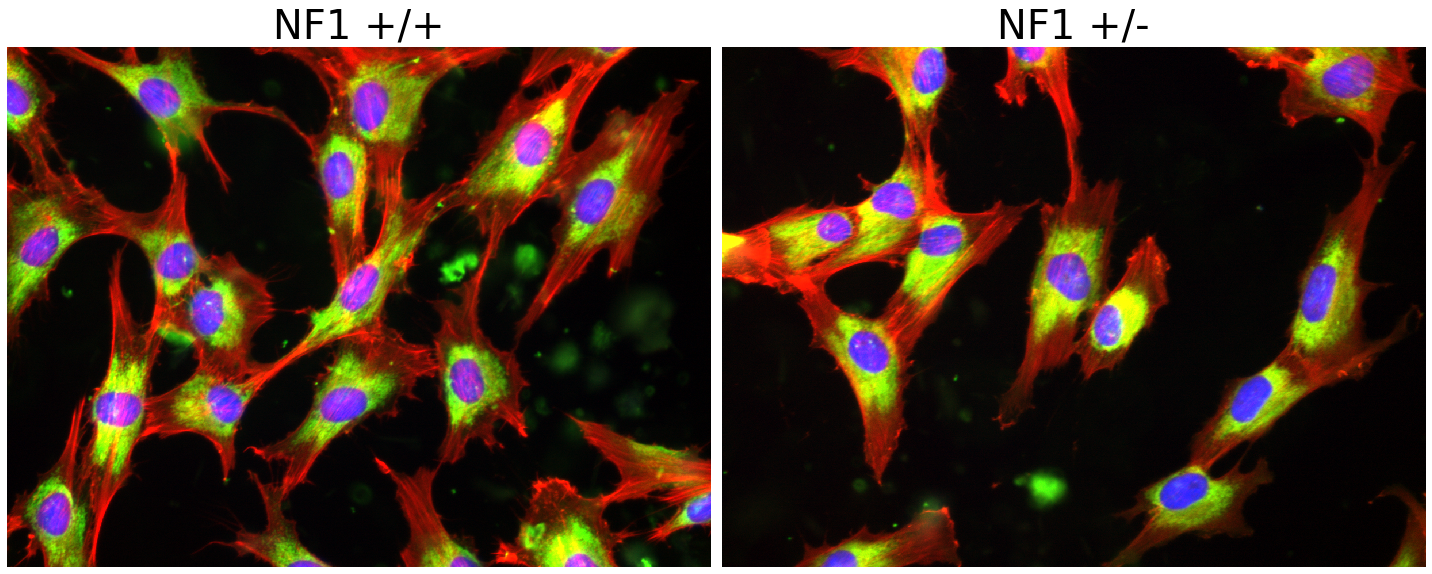

In [16]:
# Create Figure with WT and Het Cells

fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].imshow(WT, interpolation='none')
ax[1].imshow(Het, interpolation='none')
ax[0].set_title('NF1 +/+', size = 40)
ax[1].set_title('NF1 +/-', size = 40)
ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout()
plt.savefig('../NF1_Project_Figure/Grant_Figure.png')
plt.show()
